# Sales Analysis

Importing all necessary Libraries

In [77]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Merging the monthly sales csv files

In [78]:
df = pd.read_csv('./Sales_Data/Sales_January_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index = False)   
    

#### Read in updated Data Frame


In [79]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

## Clean up the data!

#### In order to create a new 'month' column and convert it from string to int32, we need to clear the data (all the NaN in df)

In [80]:
nan_df = all_data[all_data.isna().any(axis = 1)] # collecting all rows with NaN
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

## get rid of the order date column

#### In order to create a new 'month' column and convert it from string to int32, we need to clear the data (all the or in df)

In [81]:
#there are some Order Date whose registered date is 'Order Date'; hence the error 'Or'. So we sort and delete them
#We will just sort all the data != 'OR'

#temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] 
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#temp_df.head()
all_data.head()


Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

#### To create the sales column, we need to multiple items of same types
Converting the column 'Quantity Ordered' and 'Price Each' to the same types

In [82]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make it int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make it float

#all_data.head()

### Augment data with an additional 

#### Task 2: Adding a month column

In [83]:
#all_data['Month'] = 'April'
#all_data.head()

all_data['Month'] = all_data['Order Date'].str[0:2] #taking the two first items from the DateTime of the column :orderDate 
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(30)

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   
6    176562        USB-C Charging Cable                 1       11.95   
7    176563  Bose SoundSport Headphones                 1       99.99   
8    176564        USB-C Charging Cable                 1       11.95   
9    176565          Macbook Pro Laptop                 1     1700.00   
10   176566            Wired Headphones                 1       11.99   
11   176567                Google Phone                 1      600.00   
12   176568    Lightning Charging Cable                 1       14.95   
13   176569      27in 4K Gaming Monitor                 1      389.99   
14   176570       AA Batteries (4-pack)                 1        3.84   
15   176571    Lightning Charging Cable                 1       14.95   
16   176572    Apple Airpods Headphones                 1      150.00   
17   176573        USB-C Charging Cable                 1       11.95   
18   176574                Google Phone                 1      600.00   
19   176574        USB-C Charging Cable                 1       11.95   
20   176575      AAA Batteries (4-pack)                 1        2.99   
21   176576    Apple Airpods Headphones                 1      150.00   
22   176577    Apple Airpods Headphones                 1      150.00   
23   176578    Apple Airpods Headphones                 1      150.00   
24   176579       AA Batteries (4-pack)                 1        3.84   
25   176580        USB-C Charging Cable                 1       11.95   
26   176581                      iPhone                 1      700.00   
27   176582  Bose SoundSport Headphones                 1       99.99   
28   176583      AAA Batteries (4-pack)                 2        2.99   
29   176584               Flatscreen TV                 1      300.00   
30   176585  Bose SoundSport Headphones                 1       99.99   

        Order Date                           Purchase Address  Month  
0   04/19/19 08:46               917 1st St, Dallas, TX 75001      4  
2   04/07/19 22:30          682 Chestnut St, Boston, MA 02215      4  
3   04/12/19 14:38       669 Spruce St, Los Angeles, CA 90001      4  
4   04/12/19 14:38       669 Spruce St, Los Angeles, CA 90001      4  
5   04/30/19 09:27          333 8th St, Los Angeles, CA 90001      4  
6   04/29/19 13:03     381 Wilson St, San Francisco, CA 94016      4  
7   04/02/19 07:46           668 Center St, Seattle, WA 98101      4  
8   04/12/19 10:58            790 Ridge St, Atlanta, GA 30301      4  
9   04/24/19 10:38     915 Willow St, San Francisco, CA 94016      4  
10  04/08/19 14:05                83 7th St, Boston, MA 02215      4  
11  04/18/19 17:18          444 7th St, Los Angeles, CA 90001      4  
12  04/15/19 12:18              438 Elm St, Seattle, WA 98101      4  
13  04/16/19 19:23              657 Hill St, Dallas, TX 75001      4  
14  04/22/19 15:09              186 12th St, Dallas, TX 75001      4  
15  04/19/19 14:29          253 Johnson St, Atlanta, GA 30301      4  
16  04/04/19 20:30    149 Dogwood St, New York City, NY 10001      4  
17  04/27/19 18:41   214 Chestnut St, San Francisco, CA 94016      4  
18  04/03/19 19:42          20 Hill St, Los Angeles, CA 90001      4  
19  04/03/19 19:42          20 Hill St, Los Angeles, CA 90001      4  
20  04/27/19 00:30       433 Hill St, New York City, NY 10001      4  
21  04/28/19 11:42        771 Ridge St, Los Angeles, CA 90001      4  
22  04/04/19 19:25            260 Spruce St, Dallas, TX 75001      4  
23  04/09/19 23:35            513 Church St, Boston, MA 02215      4  
24  04/11/19 10:23  886 Jefferson S

#### Task 3: Adding a Sales column

In [84]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(30)

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   
6    176562        USB-C Charging Cable                 1       11.95   
7    176563  Bose SoundSport Headphones                 1       99.99   
8    176564        USB-C Charging Cable                 1       11.95   
9    176565          Macbook Pro Laptop                 1     1700.00   
10   176566            Wired Headphones                 1       11.99   
11   176567                Google Phone                 1      600.00   
12   176568    Lightning Charging Cable                 1       14.95   
13   176569      27in 4K Gaming Monitor                 1      389.99   
14   176570       AA Batteries (4-pack)                 1        3.84   
15   176571    Lightning Charging Cable                 1       14.95   
16   176572    Apple Airpods Headphones                 1      150.00   
17   176573        USB-C Charging Cable                 1       11.95   
18   176574                Google Phone                 1      600.00   
19   176574        USB-C Charging Cable                 1       11.95   
20   176575      AAA Batteries (4-pack)                 1        2.99   
21   176576    Apple Airpods Headphones                 1      150.00   
22   176577    Apple Airpods Headphones                 1      150.00   
23   176578    Apple Airpods Headphones                 1      150.00   
24   176579       AA Batteries (4-pack)                 1        3.84   
25   176580        USB-C Charging Cable                 1       11.95   
26   176581                      iPhone                 1      700.00   
27   176582  Bose SoundSport Headphones                 1       99.99   
28   176583      AAA Batteries (4-pack)                 2        2.99   
29   176584               Flatscreen TV                 1      300.00   
30   176585  Bose SoundSport Headphones                 1       99.99   

        Order Date                           Purchase Address  Month    Sales  
0   04/19/19 08:46               917 1st St, Dallas, TX 75001      4    23.90  
2   04/07/19 22:30          682 Chestnut St, Boston, MA 02215      4    99.99  
3   04/12/19 14:38       669 Spruce St, Los Angeles, CA 90001      4   600.00  
4   04/12/19 14:38       669 Spruce St, Los Angeles, CA 90001      4    11.99  
5   04/30/19 09:27          333 8th St, Los Angeles, CA 90001      4    11.99  
6   04/29/19 13:03     381 Wilson St, San Francisco, CA 94016      4    11.95  
7   04/02/19 07:46           668 Center St, Seattle, WA 98101      4    99.99  
8   04/12/19 10:58            790 Ridge St, Atlanta, GA 30301      4    11.95  
9   04/24/19 10:38     915 Willow St, San Francisco, CA 94016      4  1700.00  
10  04/08/19 14:05                83 7th St, Boston, MA 02215      4    11.99  
11  04/18/19 17:18          444 7th St, Los Angeles, CA 90001      4   600.00  
12  04/15/19 12:18              438 Elm St, Seattle, WA 98101      4    14.95  
13  04/16/19 19:23              657 Hill St, Dallas, TX 75001      4   389.99  
14  04/22/19 15:09              186 12th St, Dallas, TX 75001      4     3.84  
15  04/19/19 14:29          253 Johnson St, Atlanta, GA 30301      4    14.95  
16  04/04/19 20:30    149 Dogwood St, New York City, NY 10001      4   150.00  
17  04/27/19 18:41   214 Chestnut St, San Francisco, CA 94016      4    11.95  
18  04/03/19 19:42          20 Hill St, Los Angeles, CA 90001      4   600.00  
19  04/03/19 19:42          20 Hill St, Los Angeles, CA 90001      4    11.95  
20  04/27/19 00:30       433 Hill St, New York City, NY 10001      4     2.99  
21  04/28/19 11:42        771 Ridge St, Los Angeles, CA 900

### Task 4: adding a city columnn

In [85]:
# let's use the .apply() method which allows to run a function on a df

#in the Purchase Address column, we take the 1 member of the list that is in between the (,).
#The first item to the left of the first (,) is a space. This value is then stored in the newly created column (City). Then displayed


#all_data['column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#all_data.head()

#This can aslo be done witha function

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + '(' + get_state(x) +')')   This or the next line 
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head(30)

#all_datas = all_data.drop(columns=["steve","saphir", "column", "city", 'Column'],axis=1)
#all_datas.head()



Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   
6    176562        USB-C Charging Cable                 1       11.95   
7    176563  Bose SoundSport Headphones                 1       99.99   
8    176564        USB-C Charging Cable                 1       11.95   
9    176565          Macbook Pro Laptop                 1     1700.00   
10   176566            Wired Headphones                 1       11.99   
11   176567                Google Phone                 1      600.00   
12   176568    Lightning Charging Cable                 1       14.95   
13   176569      27in 4K Gaming Monitor                 1      389.99   
14   176570       AA Batteries (4-pack)                 1        3.84   
15   176571    Lightning Charging Cable                 1       14.95   
16   176572    Apple Airpods Headphones                 1      150.00   
17   176573        USB-C Charging Cable                 1       11.95   
18   176574                Google Phone                 1      600.00   
19   176574        USB-C Charging Cable                 1       11.95   
20   176575      AAA Batteries (4-pack)                 1        2.99   
21   176576    Apple Airpods Headphones                 1      150.00   
22   176577    Apple Airpods Headphones                 1      150.00   
23   176578    Apple Airpods Headphones                 1      150.00   
24   176579       AA Batteries (4-pack)                 1        3.84   
25   176580        USB-C Charging Cable                 1       11.95   
26   176581                      iPhone                 1      700.00   
27   176582  Bose SoundSport Headphones                 1       99.99   
28   176583      AAA Batteries (4-pack)                 2        2.99   
29   176584               Flatscreen TV                 1      300.00   
30   176585  Bose SoundSport Headphones                 1       99.99   

        Order Date                           Purchase Address  Month    Sales  \
0   04/19/19 08:46               917 1st St, Dallas, TX 75001      4    23.90   
2   04/07/19 22:30          682 Chestnut St, Boston, MA 02215      4    99.99   
3   04/12/19 14:38       669 Spruce St, Los Angeles, CA 90001      4   600.00   
4   04/12/19 14:38       669 Spruce St, Los Angeles, CA 90001      4    11.99   
5   04/30/19 09:27          333 8th St, Los Angeles, CA 90001      4    11.99   
6   04/29/19 13:03     381 Wilson St, San Francisco, CA 94016      4    11.95   
7   04/02/19 07:46           668 Center St, Seattle, WA 98101      4    99.99   
8   04/12/19 10:58            790 Ridge St, Atlanta, GA 30301      4    11.95   
9   04/24/19 10:38     915 Willow St, San Francisco, CA 94016      4  1700.00   
10  04/08/19 14:05                83 7th St, Boston, MA 02215      4    11.99   
11  04/18/19 17:18          444 7th St, Los Angeles, CA 90001      4   600.00   
12  04/15/19 12:18              438 Elm St, Seattle, WA 98101      4    14.95   
13  04/16/19 19:23              657 Hill St, Dallas, TX 75001      4   389.99   
14  04/22/19 15:09              186 12th St, Dallas, TX 75001      4     3.84   
15  04/19/19 14:29          253 Johnson St, Atlanta, GA 30301      4    14.95   
16  04/04/19 20:30    149 Dogwood St, New York City, NY 10001      4   150.00   
17  04/27/19 18:41   214 Chestnut St, San Francisco, CA 94016      4    11.95   
18  04/03/19 19:42          20 Hill St, Los Angeles, CA 90001      4   600.00   
19  04/03/19 19:42          20 Hill St, Los Angeles, CA 90001      4    11.95   
20  04/27/19 00:30       433 Hill St, New York City, NY 10001      4     2.99   
21  04/28/19 11:42        771 Ridge St

### Question 1: What was the best month for sales and how much was earned that month?

In [86]:
results = all_data.groupby('Month').sum()
copy_results = results.copy()
display(results.head(50))


Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34

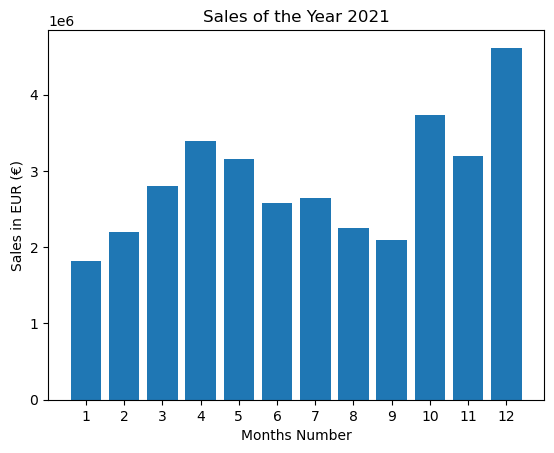

In [87]:
# Shuttle - Stops Bar Chart 

months = range(1,13)

#months = range ['January', 'February', 'March', 'April',
#          'May', 'June', 'July', 'August',
#          'September', 'October', 'November', 'December']

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in EUR (€)')
plt.xlabel('Months Number')
plt.title('Sales of the Year 2021')
plt.show()






### Question 2: What city sold the most product?

In [88]:
results = all_data.groupby('City').sum()
results

Quantity Ordered  Price Each   Month       Sales
City                                                                 
 Atlanta (GA)                   16602  2779908.20  104794  2795498.58
 Austin (TX)                    11153  1809873.61   69829  1819581.75
 Boston (MA)                    22528  3637409.77  141112  3661642.01
 Dallas (TX)                    16730  2752627.82  104620  2767975.40
 Los Angeles (CA)               33289  5421435.23  208325  5452570.80
 New York City (NY)             27932  4635370.83  175741  4664317.43
 Portland (ME)                   2750   447189.25   17144   449758.27
 Portland (OR)                  11303  1860558.22   70621  1870732.34
 San Francisco (CA)             50239  8211461.74  315520  8262203.91
 Seattle (WA)                   16553  2733296.01  104941  2747755.48

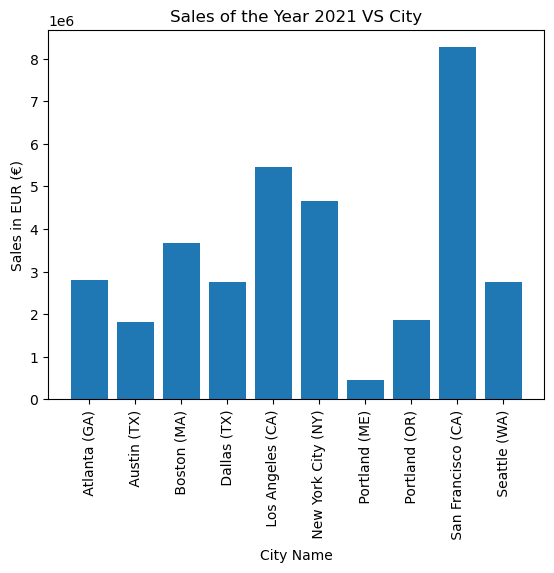

In [89]:
#  Bar Chart 

months = range(1,13)
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.ylabel('Sales in EUR (€)')
plt.xlabel('City Name')
plt.title('Sales of the Year 2021 VS City')
plt.show()

#So, we notice now than San Francisco has the highest sale maybe because it is an electronic store or becouse higher advertisement 
#Also, because people have much money there

### Question 3: What time should we display advertisements to maximize likehood of customer's buying product? 

In [90]:
#As the Order date column is in string, we'll first convert that to dateime formate
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#Creating columns of the hours, minutes
all_data['Hour'] = all_data['Order Date'].dt.hour 
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head(30)

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   
6    176562        USB-C Charging Cable                 1       11.95   
7    176563  Bose SoundSport Headphones                 1       99.99   
8    176564        USB-C Charging Cable                 1       11.95   
9    176565          Macbook Pro Laptop                 1     1700.00   
10   176566            Wired Headphones                 1       11.99   
11   176567                Google Phone                 1      600.00   
12   176568    Lightning Charging Cable                 1       14.95   
13   176569      27in 4K Gaming Monitor                 1      389.99   
14   176570       AA Batteries (4-pack)                 1        3.84   
15   176571    Lightning Charging Cable                 1       14.95   
16   176572    Apple Airpods Headphones                 1      150.00   
17   176573        USB-C Charging Cable                 1       11.95   
18   176574                Google Phone                 1      600.00   
19   176574        USB-C Charging Cable                 1       11.95   
20   176575      AAA Batteries (4-pack)                 1        2.99   
21   176576    Apple Airpods Headphones                 1      150.00   
22   176577    Apple Airpods Headphones                 1      150.00   
23   176578    Apple Airpods Headphones                 1      150.00   
24   176579       AA Batteries (4-pack)                 1        3.84   
25   176580        USB-C Charging Cable                 1       11.95   
26   176581                      iPhone                 1      700.00   
27   176582  Bose SoundSport Headphones                 1       99.99   
28   176583      AAA Batteries (4-pack)                 2        2.99   
29   176584               Flatscreen TV                 1      300.00   
30   176585  Bose SoundSport Headphones                 1       99.99   

            Order Date                           Purchase Address  Month  \
0  2019-04-19 08:46:00               917 1st St, Dallas, TX 75001      4   
2  2019-04-07 22:30:00          682 Chestnut St, Boston, MA 02215      4   
3  2019-04-12 14:38:00       669 Spruce St, Los Angeles, CA 90001      4   
4  2019-04-12 14:38:00       669 Spruce St, Los Angeles, CA 90001      4   
5  2019-04-30 09:27:00          333 8th St, Los Angeles, CA 90001      4   
6  2019-04-29 13:03:00     381 Wilson St, San Francisco, CA 94016      4   
7  2019-04-02 07:46:00           668 Center St, Seattle, WA 98101      4   
8  2019-04-12 10:58:00            790 Ridge St, Atlanta, GA 30301      4   
9  2019-04-24 10:38:00     915 Willow St, San Francisco, CA 94016      4   
10 2019-04-08 14:05:00                83 7th St, Boston, MA 02215      4   
11 2019-04-18 17:18:00          444 7th St, Los Angeles, CA 90001      4   
12 2019-04-15 12:18:00              438 Elm St, Seattle, WA 98101      4   
13 2019-04-16 19:23:00              657 Hill St, Dallas, TX 75001      4   
14 2019-04-22 15:09:00              186 12th St, Dallas, TX 75001      4   
15 2019-04-19 14:29:00          253 Johnson St, Atlanta, GA 30301      4   
16 2019-04-04 20:30:00    149 Dogwood St, New York City, NY 10001      4   
17 2019-04-27 18:41:00   214 Chestnut St, San Francisco, CA 94016      4   
18 2019-04-03 19:42:00          20 Hill St, Los Angeles, CA 90001      4   
19 2019-04-03 19:42:00          20 Hill St, Los Angeles, CA 90001      4   
20 2019-04-27 00:30:00       433 Hill St, New York City, NY 10001      4   
21 2019-04-28 11:42:00        771 Ridge St, Los Angeles, CA 90001      4   
22 2019-04-04 19:25:00            260 Spruce St, Dallas, TX 75001  

Text(0.5, 1.0, 'Number Of Orders VS Hours')

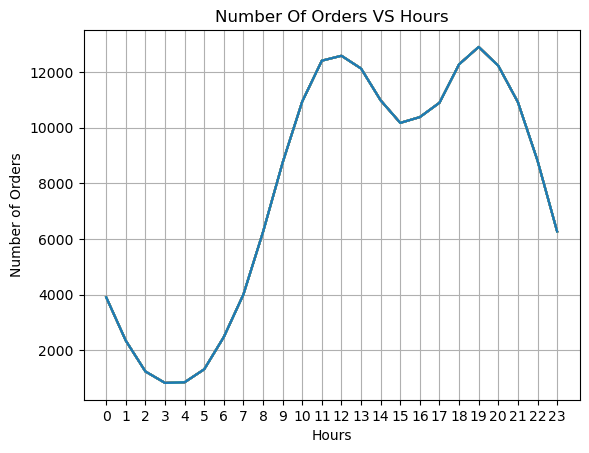

In [91]:
import seaborn as sns
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours, size = 10)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hours')
plt.title('Number Of Orders VS Hours')


#all_data.groupby(['Hour']).count()
#plt.show()


#To answer our question, according to the ploting we should display ads at out peaks hours at 11-12 and also at 19


### Please Plot a graf for each city 

### Question 4: What products are most often sold together?


In [92]:
#Here we will try to sort all the duplicated Id from same address. As duplicated ID means same orders
df = all_data[all_data['Order ID'].duplicated (keep = False)]  #displaying this df shows the combined purchase 
#df.head(50)


#Let's try to great a column that will have grouped items on the same line

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x)) #Please check the error afetr
#df.head()

#We noticed some duplicated values in the newly created column, lets drop them

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)


C:\Users\keubo\AppData\Local\Temp\ipykernel_23248\2009252048.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x)) #Please check the error afetr


Order ID                                            Grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable
129   176681           Apple Airpods Headphones,ThinkPad Laptop
138   176689  Bose SoundSport Headphones,AAA Batteries (4-pack)
189   176739                34in Ultrawide Monitor,Google Phone
225   176774      Lightning Charging Cable,USB-C Charging Cable
233   176781                    iPhone,Lightning Charging Cable
250   176797  Google Phone,Bose SoundSport Headphones,Wired ...
260   176805                  Google Phone,USB-C Charging Cable
264   176808                      Google Phone,Wired Headphones
270   176813                      Google Phone,Wired Headphones
394   176935            AAA Batteries (4-pack),27in FHD Monitor
435   176975        USB-C Charging Cable,AAA Batteries (4-pack)
450   176989                  Google Phone,USB-C Charging Cable
455   176993                            iPhone,Wired Headphones
485   177022                            iPhone,Wired Headphones
567   177102                      iPhone,27in 4K Gaming Monitor

In [93]:
# Lets count the generated pairs

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3))) # the number is to parse the right number of combinations you need
    #print(count)
count.most_common(10)


[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

### Try to make a visualisation of the data above

#### Question 5: What Product Sold the most? Why do you think it sold the most

In [94]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  Hour  Minutes  Count  
0        Dallas (TX)     8       46      1  
2        Boston (MA)    22       30      1  
3   Los Angeles (CA)    14       38      1  
4   Los Angeles (CA)    14       38      1  
5   Los Angeles (CA)     9       27      1

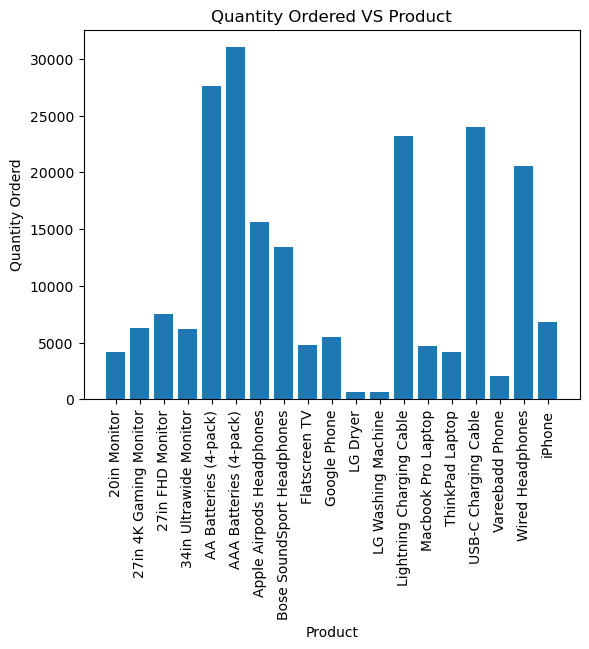

In [95]:
product_group = all_data.groupby('Product')
#product_group.sum()
quatity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products , quatity_ordered)
plt.xticks(products, rotation = 'vertical', size = 10)
plt.ylabel('Quantity Orderd')
plt.xlabel('Product')
plt.title('Quantity Ordered VS Product')
plt.show()





##### From the graph we can elaborate a Hypothesis that : Most of our sold items are cheap items.
This can be proven by overlaying the graph above with the actual prices of the items in order to check for correlation 

C:\Users\keubo\AppData\Local\Temp\ipykernel_23248\1296306822.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 10)


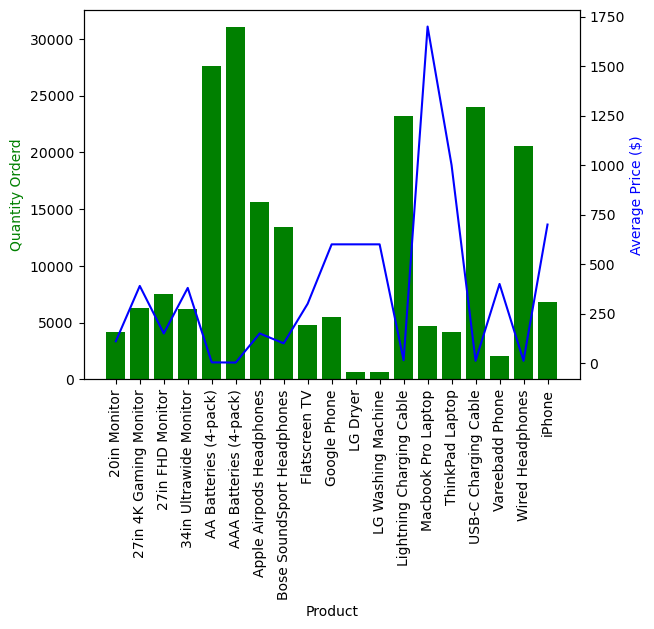

In [96]:
# To do this, let find the mean/Average price of the sold items
AvPrice = all_data.groupby('Product').mean()['Price Each']
#print(AvPrice)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products , quatity_ordered, color = 'green')
ax2.plot(products, AvPrice, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Orderd', color='g')
ax2.set_ylabel('Average Price ($)', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 10)
plt.show()


# Linear Regression Prediction


1.   Sales Prediction
2.   Quantity Ordered Prediction



Month
1    10903
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
3    17005
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
3    17005
4    20558
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
3    17005
4    20558
5    18667
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
3    17005
4    20558
5    18667
6    15253
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
3    17005
4    20558
5    18667
6    15253
7    16072
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
3    17005
4    20558
5    18667
6    15253
7    16072
8    13448
Name: Quantity Ordered, dtype: int64

Month
1    10903
2    13449
3    17005
4    20558
5    18667
6    15253
7    16072
8    13448
9    13109
Name: Quantity Ordered, dtype: int64

Month
1     10903
2     13449
3     17005
4     20558
5     18667
6     15253
7     16072
8     13448
9     13109
10    22703
Name: Quantity Ordered, dtype: int64

Month
1     10903
2     13449
3     17005
4     20558
5     18667
6     15253
7     16072
8     13448
9     13109
10    22703
11    19798
Name: Quantity Ordered, dtype: int64

Month
1     10903
2     13449
3     17005
4     20558
5     18667
6     15253
7     16072
8     13448
9     13109
10    22703
11    19798
12    28114
Name: Quantity Ordered, dtype: int64

'Correlation Table'

Month  Quantity Ordered     Sales
Month             1.000000          0.609091  0.589156
Quantity Ordered  0.609091          1.000000  0.998604
Sales             0.589156          0.998604  1.000000

The mean square error of actual value and predicted value for Months and Sales ;  376547598167.19415


' Next Year Sales Prediction Per Month'

Months         Sales
0        1  2.161477e+06
1        2  2.291088e+06
2        3  2.420699e+06
3        4  2.550309e+06
4        5  2.679920e+06
5        6  2.809531e+06
6        7  2.939142e+06
7        8  3.068752e+06
8        9  3.198363e+06
9       10  3.327974e+06
10      11  3.457585e+06
11      12  3.587195e+06

2031866.5224242425
[129610.73975524]


C:\Users\keubo\AppData\Local\Temp\ipykernel_23248\308807383.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_curr_pred_sales = monthly_sales_data.append(ny_sales_prediction, ignore_index = True)


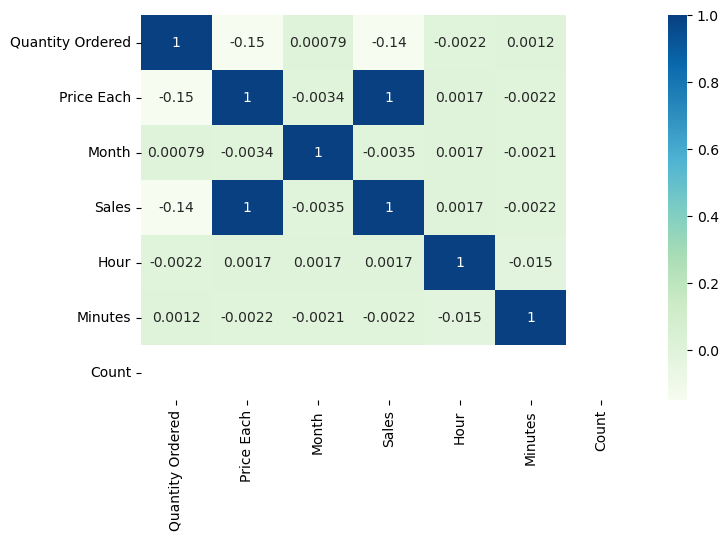

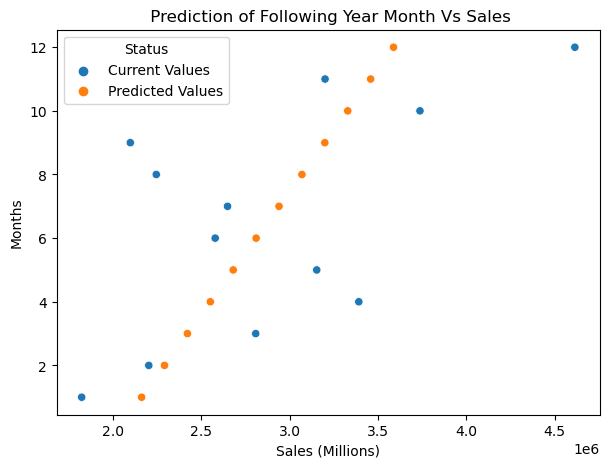

The mean square error of actual value and predicted value is Quantity Ordered and Month;  13555931.214160837
0.3709918977726181


Month  Quantity Ordered       Sales
0       1             10903  1822256.73
1       2             13449  2202022.42
2       3             17005  2807100.38
3       4             20558  3390670.24
4       5             18667  3152606.75
5       6             15253  2577802.26
6       7             16072  2647775.76
7       8             13448  2244467.88
8       9             13109  2097560.13
9      10             22703  3736726.88
10     11             19798  3199603.20
11     12             28114  4613443.34

C:\Users\keubo\AppData\Local\Temp\ipykernel_23248\308807383.py:166: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_curr_pred_quod = copy_monthly_sales.append(ny_quord_prediction, ignore_index = True)


' Next Year Quantity Ordered Prediction Per Month'

Month  Quantity Ordered
0       1      12918.153846
1       2      13737.262238
2       3      14556.370629
3       4      15375.479021
4       5      16194.587413
5       6      17013.695804
6       7      17832.804196
7       8      18651.912587
8       9      19471.020979
9      10      20290.129371
10     11      21109.237762
11     12      21928.346154

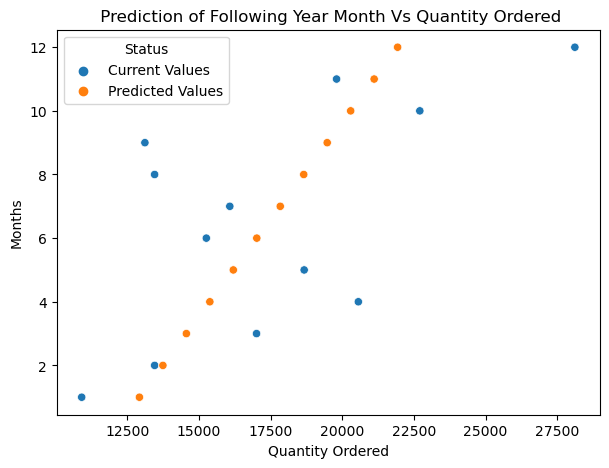

The mean square error of actual value and predicted value is for Quantity Ordered and Sales;  1608837104.96794
0.9972104396818211


C:\Users\keubo\AppData\Local\Temp\ipykernel_23248\308807383.py:224: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_curr_pred_quod = qty_orderd_and_sale.append(ny_qty_orderd_sales_data, ignore_index = True)


' Next Year Quantity Ordered Prediction Per Sales'

Quantity Ordered         Sales
0              10903  1.809190e+06
1              13449  2.225104e+06
2              17005  2.806011e+06
3              20558  3.386428e+06
4              18667  3.077515e+06
5              15253  2.519805e+06
6              16072  2.653596e+06
7              13448  2.224941e+06
8              13109  2.169562e+06
9              22703  3.736835e+06
10             19798  3.262275e+06
11             28114  4.620774e+06

<AxesSubplot:title={'center':' Prediction of Following Year Quantity Ordered Vs Sales'}, xlabel='Quantity Ordered', ylabel='Sales'>

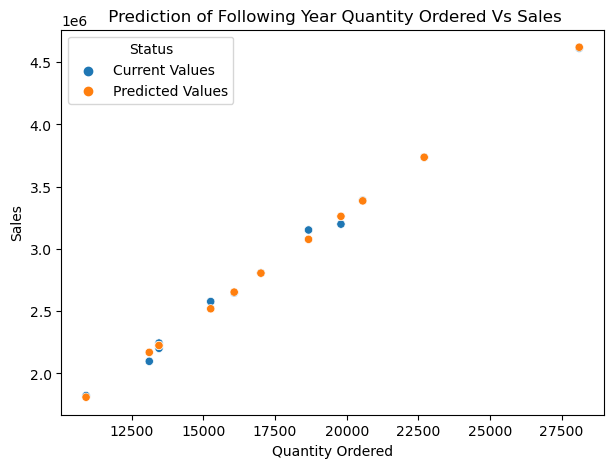

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Constituting monthly sales data in a neat manner
monthly_sales_values = []
quantity_ordered_sales_values = []
for i in range(1,13):
  values = copy_results.iloc[:i]     # after analysis, my data was no more in a flat manner
  sales_data = values["Sales"]       #so i used the iloc to ignore the columns and use the rows
  quantity_orderd_data = values["Quantity Ordered"]
  display(quantity_orderd_data)
  monthly_sales_values.append([i,sales_data.iloc[i-1]])
  quantity_ordered_sales_values.append([i,quantity_orderd_data.iloc[i-1]])

monthly_sales_data = pd.DataFrame(monthly_sales_values,columns=["Months","Sales"])  #constituting the monthly sales data

quantity_ordered_sales_data = pd.DataFrame(quantity_ordered_sales_values,columns=["Quantity Ordered","Sales"])

###It is at this point the data was collected to plot the Polynomial linear regretion
copymonthsales = monthly_sales_data.copy()#

copy_qty_order_sales = quantity_ordered_sales_data.copy()
####display(copymonthsales)


months = [1,2,3,4,5,6,7,8,9,10,11,12]
monthly_data = []
for month in months:
    sales_data = all_data[all_data["Month"] == month]
    monthly_data.append([month,sales_data["Quantity Ordered"].sum(),sales_data["Sales"].sum()])

monthly_sales = pd.DataFrame(monthly_data,columns = ["Month","Quantity Ordered","Sales"])

#copymonthsales = monthly_data.copy()

"""
 Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate)
 There are basically 3 types of correlation : 
  1. Positive Correlation (0.1 and above) : When the 2 variables go in the same direction (in the positive axis). For example ice cream sales as temperature go high
  2. Negative Correlation (-0.1 and below) : When the 2 variables go in opposite direction (inversely related) For example Pressure, P = Force (F) / Area(A)
  The higher the surface area, the lower the pressure, the higher the pressure, the lower the surface area
  3. No correlation : This is when the 2 variables are not related ( value of correlation is generally 0 or 0.0...)
"""
display("Correlation Table")
display(monthly_sales.corr())
plt.figure(figsize=(8,5))
sns.heatmap(all_data.corr(), annot=True, cmap='GnBu')



#plt.figure(figsize=(15,8))
#sns.heatmap(monthly_sales.corr(), annot=True, cmap='GnBu')
"""
Linear Regression model used is a one factor linear regression model. i.e prediction of the target variable( What we are predicting)
is based on one factor. 
# The predictions done here are Sales based on the month and the quantity ordered  based on month
# Equation of a linear model is of the form : 
                    y = a + mx
                    y = linreg.intercept_ +  linreg.coef_ x independent_variable
                    y being the target variable, a being the intercept, m being the slope, x being the independent variable and linreg Linear Regression object
                    For instance : 
                    predicted_quantity_ordered = a + m*month
"""

linreg = LinearRegression()

"""
Linear Regression for Months and Sales
=======================================
 # Independent Variable - Month : Denoted X
 # Dependent Variable, Target Variable = Sales : Denoted Y
 # ny_sales = next year sales : Prediction of sales of the following year based on the month
"""
# Setting Dependent and Independent Variables
X = monthly_sales[['Month']] 
Y = monthly_sales['Sales'] 
# Fitting the model using Sales 
linreg.fit(X,Y)
ny_sales = linreg.predict(X) 


# Importing MSE
mse = mean_squared_error(Y,ny_sales)
print("The mean square error of actual value and predicted value for Months and Sales ; ",mse)

# Constituting sales prediction data
ny_sales_prediction = pd.DataFrame(columns=["Months","Sales"])
ny_sales_prediction["Months"] = X 
ny_sales_prediction["Sales"] = ny_sales
display(" Next Year Sales Prediction Per Month")
display(ny_sales_prediction)

print(linreg.intercept_)
print(linreg.coef_)
copy_ny_sales_prediction = ny_sales_prediction.copy()

# Regression Plot - Month Vs Sales on monthly sales
width = 7
height = 5
plt.figure(figsize=(width, height))
#sns.regplot(x="Sales", y="Month", data=monthly_sales)
#plt.ylim(0,)


# Adding a categorical Column for Plotting
ny_sales_prediction["Status"] = "Predicted Values"
monthly_sales_data["Status"] = "Current Values"

copy_monthly_sales = monthly_sales[["Month","Quantity Ordered"]]
copy_monthly_sales["Status"] = "Current Values"

#Joining 2 dataframes into one
overall_curr_pred_sales = monthly_sales_data.append(ny_sales_prediction, ignore_index = True)

plt.title(" Prediction of Following Year Month Vs Sales")
plt.xlabel("Sales (Millions)")
plt.ylabel("Months")

sns.scatterplot(x='Sales', y='Months', hue='Status', 
             data=overall_curr_pred_sales)
plt.show()


"""
Linear Regression for Quantity Ordered and Month
=======================================
 # Independent Variable - Month : Denoted X
 # Dependent Variable, Target Variable = Quantity Ordered : Denoted Y
 # ny_quord = next year quantity ordered : Prediction of quantity ordered of the following year based on the month
"""
# Setting Dependent and Independent Variables
X = monthly_sales[['Month']] 
Y = monthly_sales['Quantity Ordered'] 
# Fitting the model using Quantity Ordered 
linreg.fit(X,Y)
ny_quord = linreg.predict(X) 



# Importing MSE
mse = mean_squared_error(Y,ny_quord)
print("The mean square error of actual value and predicted value is Quantity Ordered and Month; ",mse)

# Score (% accuracy)
print(linreg.score(X,Y))

# Constituting sales prediction data
ny_quord_prediction = pd.DataFrame(columns=["Month","Quantity Ordered"])
ny_quord_prediction["Month"] = X 
ny_quord_prediction["Quantity Ordered"] = ny_quord

display(monthly_sales)

# Regression Plot - Quantity Ordered Vs Month 
width = 7
height = 5
plt.figure(figsize=(width, height))
#sns.regplot(x="Quantity Ordered", y="Month", data=monthly_sales)
#plt.ylim(0,)

# Adding a categorical Column for Plotting
ny_quord_prediction["Status"] = "Predicted Values"
# Joining 2 dataframes into one
overall_curr_pred_quod = copy_monthly_sales.append(ny_quord_prediction, ignore_index = True)
display(" Next Year Quantity Ordered Prediction Per Month")
display(ny_quord_prediction[["Month","Quantity Ordered"]])

plt.title(" Prediction of Following Year Month Vs Quantity Ordered")
plt.xlabel("Quantity Ordered")
plt.ylabel("Months")
sns.scatterplot(x='Quantity Ordered', y='Month', hue='Status', 
              data=overall_curr_pred_quod)
plt.show()


"""
Linear Regression for Quantity Ordered and Sales
=======================================
 # Independent Variable - Quantity ordered  : Denoted X
 # Dependent Variable, Target Variable = Sales : Denoted Y
 # ny_quord = next year quantity ordered : Prediction of quantity ordered of the following year based on the sales
"""
# Setting Dependent and Independent Variables
X = monthly_sales[['Quantity Ordered']] 
Y = monthly_sales['Sales'] 
# Fitting the model using Quantity Ordered 
linreg.fit(X,Y)
ny_qty_orderd_sale_predic = linreg.predict(X) 


# Importing MSE
mse = mean_squared_error(Y,ny_qty_orderd_sale_predic)
print("The mean square error of actual value and predicted value is for Quantity Ordered and Sales; ",mse)

# Score (% accuracy)
print(linreg.score(X,Y))





# Constituting sales prediction data
ny_qty_orderd_sales_data = pd.DataFrame(columns=["Quantity Ordered","Sales"])
ny_qty_orderd_sales_data["Quantity Ordered"] = X 
ny_qty_orderd_sales_data["Sales"] = ny_qty_orderd_sale_predic


# Regression Plot - Sales Vs Quantity Ordered   
width = 7
height = 5
plt.figure(figsize=(width, height))
#sns.regplot(x="Quantity Ordered", y="Sales", data=monthly_sales)
#plt.ylim(0,)



# Adding a categorical Column for Plotting
ny_qty_orderd_sales_data["Status"] = "Predicted Values"
# Joining 2 dataframes into one
qty_orderd_and_sale = monthly_sales[['Quantity Ordered', 'Sales']]
qty_orderd_and_sale["Status"] = "Current Values"
overall_curr_pred_quod = qty_orderd_and_sale.append(ny_qty_orderd_sales_data, ignore_index = True)
display(" Next Year Quantity Ordered Prediction Per Sales")
display(ny_qty_orderd_sales_data[["Quantity Ordered", "Sales"]])

plt.title(" Prediction of Following Year Quantity Ordered Vs Sales")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales")
sns.scatterplot(x='Quantity Ordered', y='Sales', hue='Status', 
              data=overall_curr_pred_quod)
    #plt.show()



### Checking on the Linear regression

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
display(copymonthsales)

Months       Sales
0        1  1822256.73
1        2  2202022.42
2        3  2807100.38
3        4  3390670.24
4        5  3152606.75
5        6  2577802.26
6        7  2647775.76
7        8  2244467.88
8        9  2097560.13
9       10  3736726.88
10      11  3199603.20
11      12  4613443.34

In [100]:
# defining e and y for the above dataframe
x = copymonthsales[['Months']]
y = copymonthsales[['Sales']] 

In [101]:
from sklearn.model_selection import train_test_split #Library used in order to splid
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0) 

In [102]:
x_train, x_test, y_train, y_test

(   Months
 2       3
 8       9
 1       2
 7       8
 9      10
 3       4
 0       1
 5       6,
     Months
 6        7
 11      12
 4        5
 10      11,
         Sales
 2  2807100.38
 8  2097560.13
 1  2202022.42
 7  2244467.88
 9  3736726.88
 3  3390670.24
 0  1822256.73
 5  2577802.26,
          Sales
 6   2647775.76
 11  4613443.34
 4   3152606.75
 10  3199603.20)

In [103]:
#for multiple regression, we need to import the library below
from sklearn.linear_model import LinearRegression

#Lets define a function

reg = LinearRegression()
#let fit the model with split data
reg.fit(x_train, y_train)

LinearRegression()

In [104]:
#Now lets make the prediction; we need to define a function to save the data
y_prediction = reg.predict(x_test)
y_prediction

array([[2724885.79392801],
       [3078916.34447574],
       [2583273.57370892],
       [3008110.2343662 ]])

In [105]:
y_test

Sales
6   2647775.76
11  4613443.34
4   3152606.75
10  3199603.20

##### The x and y are of the same length; 4x4 as observed above, so you can plot a graph as it was done for linear regression

## Polynomial Regression 

In [106]:
# for polynomial, we use the same library as above
display(copymonthsales)

Months       Sales
0        1  1822256.73
1        2  2202022.42
2        3  2807100.38
3        4  3390670.24
4        5  3152606.75
5        6  2577802.26
6        7  2647775.76
7        8  2244467.88
8        9  2097560.13
9       10  3736726.88
10      11  3199603.20
11      12  4613443.34

In [107]:
#lets define a function for the purpose of x and y

x = copymonthsales[['Months']]
y = copymonthsales[['Sales']] 

#display(copy_ny_sales_prediction)


In [108]:
# as seen above, we have less dataset so we use it without the need of splitting them to traing and testing
#lets import library for regression

from sklearn.linear_model import LinearRegression

#Polynimial regression are worked benief of linear regression
lin_reg = LinearRegression()

lin_reg.fit(x,y)

LinearRegression()

In [109]:
#import library for polynomial 
from sklearn.preprocessing import PolynomialFeatures
#defining a function to save to save our data in the function



poly_reg = PolynomialFeatures(degree=3) #getting a look at the polynomial formula (https://www.google.com/search?q=polynomial+linear+regression+formula&rlz=1C1CHBF_deDE1028DE1028&sxsrf=ALiCzsZ9tWEAbmxXn8e8XLrGpCVkbAa9Pg:1671288084390&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjajdmk8YD8AhWF7aQKHclHDz8Q_AUoAXoECAEQAw&biw=1280&bih=569&dpr=1.5#imgrc=75F5BvqaJjpLNM)

x_poly = poly_reg.fit_transform(x)
poly_reg.fit(x_poly,y)


## Defining the PR function used to draw the seconde graph below

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression()

In [110]:
x_poly #from 1 to 12 are the values of x. 1,4,9,16... are the squared values of x

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03]])

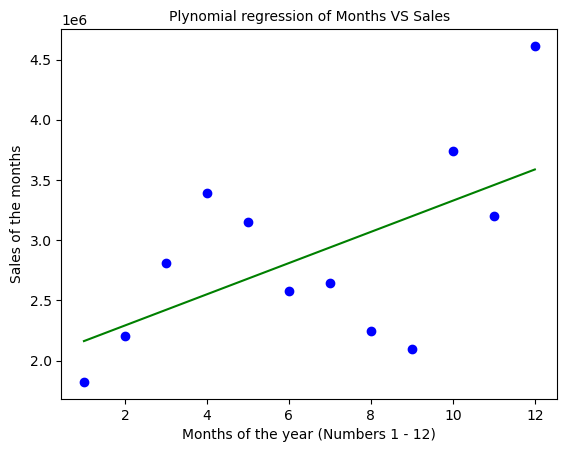

In [111]:
# As polynomial regression is worked benief linear regression, lets plat the linear regression
plt.scatter(x,y, color = 'blue')
plt.plot(x, lin_reg.predict(x), color ='green')
plt.title('Plynomial regression of Months VS Sales', size=10)
plt.xlabel('Months of the year (Numbers 1 - 12)')
plt.ylabel('Sales of the months')
plt.show()

#x_poly

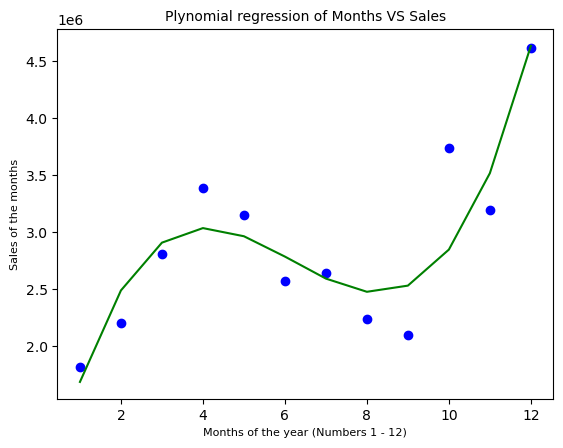

In [112]:
## Now lets show the polynomial regression, but we need to first define some functions because PL works benief the LR 
## check In[177] for the PR function

plt.scatter(x,y, color = 'blue')
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color ='green')
plt.title('Plynomial regression of Months VS Sales', size=10)
plt.xlabel('Months of the year (Numbers 1 - 12)', size = 8)
plt.ylabel('Sales of the months', size = 8)
plt.show()

In [113]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  Hour  Minutes  Count  
0        Dallas (TX)     8       46      1  
2        Boston (MA)    22       30      1  
3   Los Angeles (CA)    14       38      1  
4   Los Angeles (CA)    14       38      1  
5   Los Angeles (CA)     9       27      1

' Next Year Sales Prediction Per Month'

Months         Sales
0        1  2.161477e+06
1        2  2.291088e+06
2        3  2.420699e+06
3        4  2.550309e+06
4        5  2.679920e+06
5        6  2.809531e+06
6        7  2.939142e+06
7        8  3.068752e+06
8        9  3.198363e+06
9       10  3.327974e+06
10      11  3.457585e+06
11      12  3.587195e+06

Months         Sales
0        1  2.161477e+06
1        2  2.291088e+06
2        3  2.420699e+06
3        4  2.550309e+06
4        5  2.679920e+06
5        6  2.809531e+06
6        7  2.939142e+06
7        8  3.068752e+06
8        9  3.198363e+06
9       10  3.327974e+06
10      11  3.457585e+06
11      12  3.587195e+06

[3587195.39948718]
2031866.5224242427
[64805.36987762]


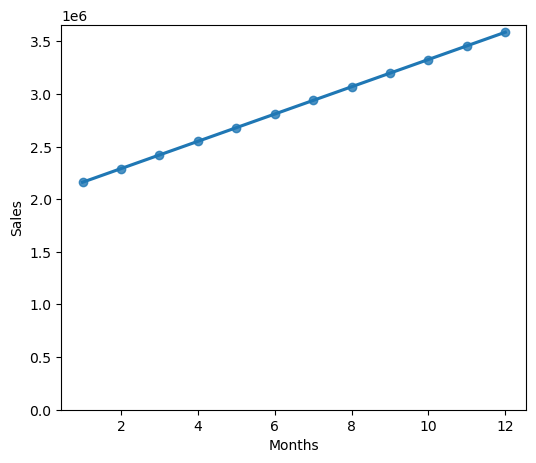

In [114]:
# Setting Dependent and Independent Variables
copy_ny_sales_prediction['Months'] = [1,2,3,4,5,6,7,8,9,10,11,12]
copy_cü_ny_sales_prediction = copy_ny_sales_prediction.copy()

copy_cü_ny_sales_prediction['Months'] = [2, 4, 6, 8,10, 12, 14, 16, 18, 20, 22, 24]

#X = copy_ny_sales_prediction[['Months']]
X = copy_cü_ny_sales_prediction[['Months']]
Y = copy_ny_sales_prediction['Sales'] 
# Fitting the model using Sales 
linreg.fit(X,Y)
ny_sales = linreg.predict(X) 

# Constituting sales prediction data
ny_sales_prediction2 = pd.DataFrame(columns=["Months","Sales"])
ny_sales_prediction2["Months"] = [1,2,3,4,5,6,7,8,9,10,11,12]
ny_sales_prediction2["Sales"] = ny_sales
display(" Next Year Sales Prediction Per Month")

display(copy_ny_sales_prediction)
display(ny_sales_prediction2)

# Regression Plot - Month Vs Sales on monthly sales
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="Months", y="Sales", data=ny_sales_prediction2)
plt.ylim(0,)

y = linreg.intercept_ +  linreg.coef_ * 24
print(y)
print(linreg.intercept_)
print(linreg.coef_)